#  Payment default prediction by Neural Network: Utilizing TensorFlow

This dataset includes data on bill statements, demographic information, credit data, payment history, and default payments for credit card users in Taiwan from April 2005 to September 2005. The main objective here is to forecast payment default for the following month.

In [1]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## 1. Data Inspection

A initial study of the data reveals 30000 rows of information in 25 columns with 23 features. Preprocessing and replacement are not particularly necessary because the data is comparatively clean.

In [2]:

data = pd.read_csv('uci_credit_card.csv')
data.info()
print('------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## 2. Exploratory Data Analysis

Before building the model, we conducted exploratory data analysis to gain
insights into the data. We looked at the distribution of the target variable,
the distribution of the features, and the correlation between the features and
the target variable. We found that the data set was imbalanced, with only
22% of the clients defaulting on their credit card payments. We also found
that there were several features that were highly correlated with the target
variable, such as payment status and amount of bill statement.In this section, all features are visualized based on their total and default distribution.


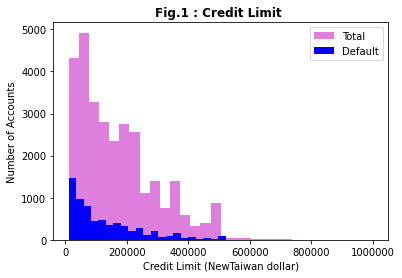

In [3]:
%matplotlib inline
bins = 30
plt.hist(data.LIMIT_BAL, bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(data.LIMIT_BAL[data['default.payment.next.month'] == 1], bins = bins, color='b',label = 'Default')

plt.xlabel('Credit Limit (NewTaiwan dollar)');plt.ylabel('Number of Accounts')
plt.title('Fig.1 : Credit Limit ',fontweight="bold", size=12)
plt.ticklabel_format(style='plain')
plt.legend();plt.show()

This plot shows the distribution of credit limits (in New Taiwan dollar) for all accounts (labeled "Total" in magenta) and those accounts that defaulted on their payments (labeled "Default" in blue). The x-axis represents the credit limit in New Taiwan dollar and the y-axis shows the number of accounts. The histogram displays the number of accounts for a
range of credit limits (bin size is 30 in this case). The plot shows that the majority of accounts have credit limits between 0 to 400,000 New Taiwan dollars, while the number of defaults is higher for accounts with lower credit limits. The plot also indicates that the distribution of credit limits is slightly skewed to the right.


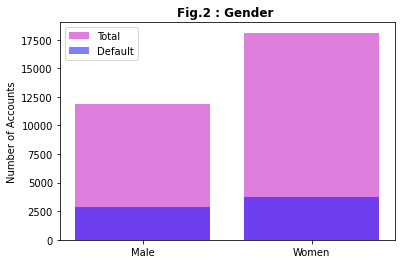

In [4]:
# Gender (Feature name :'SEX' )
men = data['SEX'][data['SEX']==1].count()
men_default = data['SEX'][(data['SEX']==1)&(data['default.payment.next.month']==1)].count()

women = data['SEX'][data['SEX']==2].count()
women_default = data['SEX'][(data['SEX']==2)&(data['default.payment.next.month']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='m',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='b',alpha=0.5, label='Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()

The chart shows that the number of female credit card account holders ishigher than male account holders. However, when it comes to defaults, thereare slightly more defaults in female accounts than in male accounts. The blue bars represent the number of defaults in each gender, while the magenta bars represent the total number of accounts in each gender. This chart helps to visualize the relationship between gender and credit card defaults in the dataset.

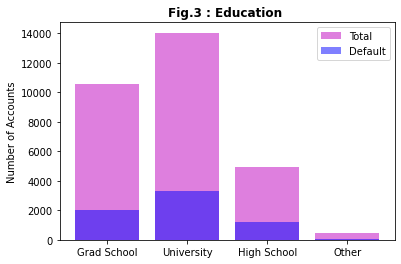

In [5]:
# Education (Feature name :'EDUCATION' )
grad =  data['EDUCATION'][data['EDUCATION']==1].count()
grad_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['default.payment.next.month']==1)].count()

uni =  data['EDUCATION'][data['EDUCATION']==2].count()
uni_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['default.payment.next.month']==1)].count()

high =  data['EDUCATION'][data['EDUCATION']==3].count()
high_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['default.payment.next.month']==1)].count()

other =  data['EDUCATION'][data['EDUCATION'] > 3].count()
other_default = data['EDUCATION'][(data['EDUCATION'] > 3)&(data['default.payment.next.month']==1)].count()

total_education = [grad, uni, high, other]
default_education = [grad_default,uni_default,high_default, other_default]
degree = [1,2,3,4]
plt.bar(degree,total_education, color='m',alpha=0.5, label='Total')
plt.bar(degree,default_education, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3,4],['Grad School','University','High School','Other'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : Education ',fontweight="bold", size=12)
plt.legend();plt.show()

This chart shows the distribution of the education level of credit card holders in the dataset, as well as the distribution of education level for those who defaulted on their payments. The education levels are grouped into four categories: graduate school (1), university (2), high school (3), and other (4). The chart shows that the largest group of credit card holders
have a university education (represented by the bar at the second position), followed by those with a graduate school education (represented by the bar at the first position). The number of credit card holders with a high school education is lower, and the number of those with an "other" education is the lowest. When we look at the defaulting credit card holders (represented by the blue bars), we can see that the percentage of defaulters in the University education group is relatively high compared to the other education groups. The percentage of defaulters is also relatively high for those with university
education.

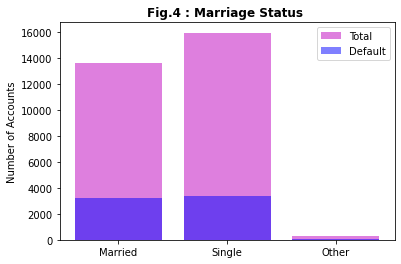

In [6]:
# Marriage Status (Feature name :'MARRIAGE')
married =  data['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = data['MARRIAGE'][(data['MARRIAGE']==1)&(data['default.payment.next.month']==1)].count()

single =  data['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = data['MARRIAGE'][(data['MARRIAGE']==2)&(data['default.payment.next.month']==1)].count()

other =  data['MARRIAGE'][data['MARRIAGE']==3].count()
other_default = data['MARRIAGE'][(data['MARRIAGE']==3)&(data['default.payment.next.month']==1)].count()

total_marriage = [married, single, other]
default_marriage = [married_default,single_default,other_default]
status = [1,2,3]
plt.bar(status,total_marriage, color='m',alpha=0.5, label='Total')
plt.bar(status,default_marriage, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3],['Married','Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

The marital status chart shows that the majority of the credit card holders in the dataset are single, with a count of over 16,000. The second-largest group is married, with a count of around 14,000. The smallest group is those who fall under the 'Other' category, which includes divorced and widowed individuals. Interestingly, the default rate among single individuals is the highest among the three categories, with almost 25% . The default rate for married individuals is slightly lower at around 22%, and the default rate for the 'Other' category is the lowest at just under 21%. Overall, it seems that marital status can be a useful predictor of credit card default, with married individuals being more likely to default than single or 'Other' individuals.


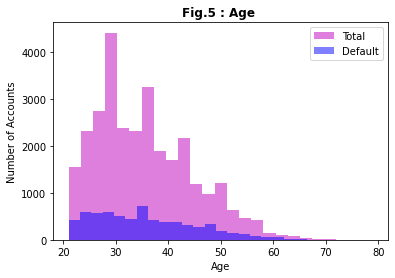

In [7]:
bins = 25

plt.hist(data['AGE'],bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(data['AGE'][data['default.payment.next.month']==1], bins = bins, color='b',label = 'Default',alpha=0.5)

plt.xlabel('Age'); plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Age ',fontweight="bold", size=12)
plt.legend();plt.show()

The age distribution chart shows a comparison of the total number of accounts and the number of defaulted accounts by age. We can see that the highest frequency of accounts is in the age range of 25-35 years, with a gradual decrease after the age of 35. We can also see that the frequency of defaulted accounts increases with age, peaking at the age range of 30- 40 years, and gradually decreasing after the age of 40. This trend suggests that younger people have a higher frequency of accounts but are less likely to default, while older people have a lower frequency of accounts but are more likely to default. The chart also shows that there is a small number of defaulted accounts in the age range of 60-70 years, which could be an interesting observation worth investigating further.

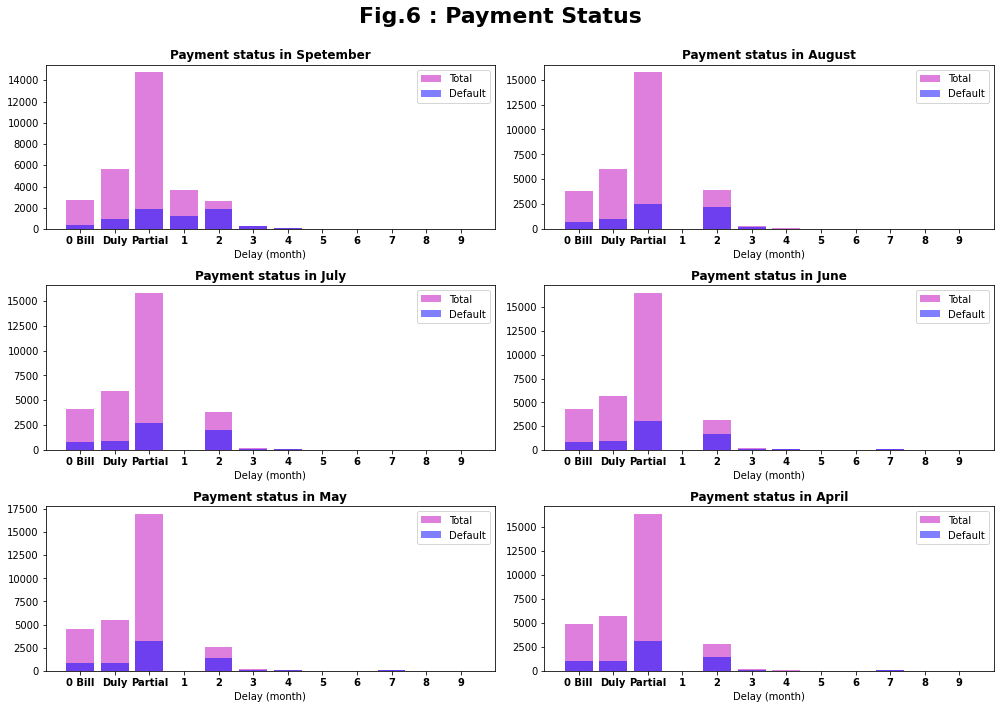

In [8]:
# Payment status (Feature name :'PAY_' )
import matplotlib.gridspec as gridspec
features = list(data.columns)
plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Fig.6 : Payment Status',fontweight="bold", fontsize=22)
for cn in features[6:12]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = data[cn][data[cn]==j-2].count()
            delay_default[j] = data[cn][(data[cn]==j-2)&(data['default.payment.next.month']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='m',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='b',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['0 Bill','Duly','Partial','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

Note:According to the metadata description, a value of -1 denotes "pay duly," while a value of 1–9 denotes months of payment delay. Further investigation, however, reveals that the value of -2 is connected to a bill amount of zero and the value of 0 is connected to a partial bill payment. These two traits are among the major categories, as the preceding statistic plainly shows, and shouldn't be disregarded.   


The above chart displays the payment status in six consecutive months, starting from April to September. The x-axis represents the delay in months with values ranging from 0 (indicating no delay) to 9 (indicating a delay of nine months). The y-axis represents the number of accounts in each category of delay status. For each month, two bars are displayed, one in blue representing the number of accounts that defaulted, and the other in magenta representing the total number of accounts. 

From the chart, we can observe that the majority of the accounts have no delay in their payments. However, there are some accounts with delayed payments, with the most significant number of delayed payments occurring in May. The number of accounts that default increases with the increase in the number of months delayed, with the highest number of defaults observed in accounts with a delay of 2 months. Overall, the trend in the number of accounts that default and the number of accounts with a delay in payment seems to be consistent across the six months, with the highest number of accounts observed in September. This chart can be useful in identifying the accounts that are most likely to default based on their payment status and it suggests that the payment status is a good predictor of whether a customer will default, and that customers who have delayed their payments for a longer duration are more likely to default. This information could be used by the credit card company to identify customers who are at risk of defaulting and take appropriate measures to mitigate that risk.

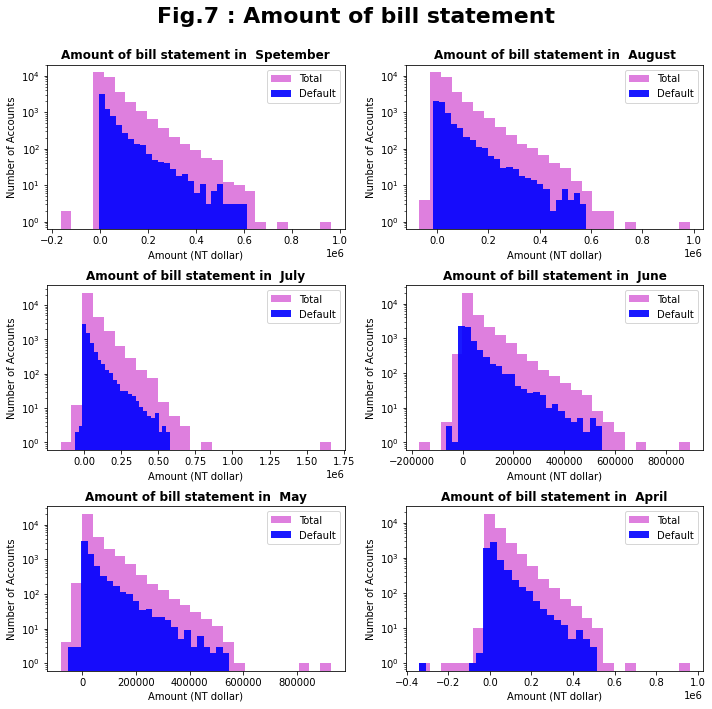

In [9]:

features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.7 : Amount of bill statement',fontweight="bold", fontsize=22)
for cn in features[12:18]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='m',label = 'Total',alpha=0.5)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='b',label = 'Default',alpha=0.9)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log',)

    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Amount of bill statement in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1  
    plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

The above plot shows the distribution of bill statement amounts for the months of April through September. The histograms show that the distribution of the amount of bill statement is heavily skewed to the right, with a long tail of high values. Most of the accounts have bill statements less than 100,000 NT dollars, but there are a significant number of accounts with bill statements above this amount. The histograms also show that the number of defaults is higher for accounts with higher bill statements, particularly for those with bill statements between 50,000 NT dollars to 200,000 NT dollars. This suggests that the amount of bill statement is an important predictor of whether an account will default on their payment next month.

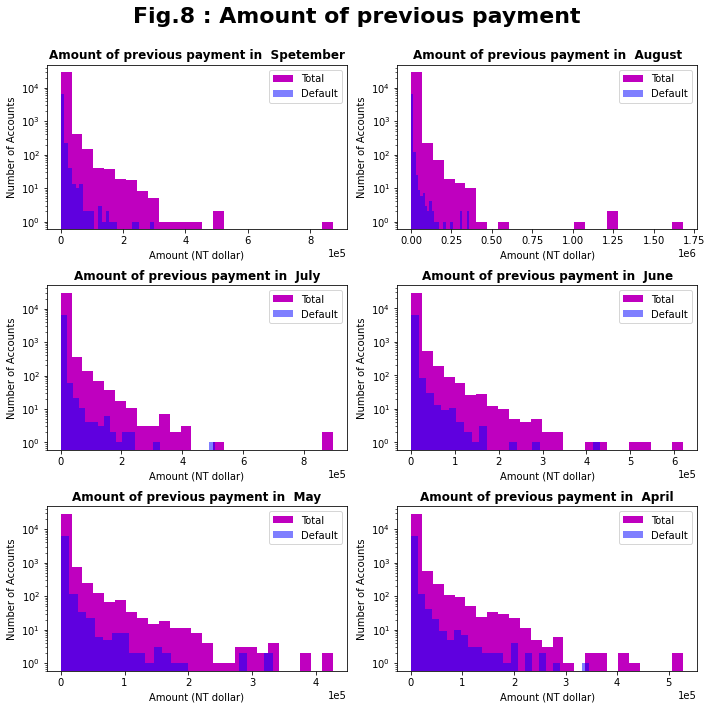

In [10]:
features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.8 : Amount of previous payment',fontweight="bold", fontsize=22)
for cn in features[18:24]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='m',label = 'Total',alpha=1)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='b',label = 'Default',alpha=0.5)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Amount of previous payment in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1      
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

The chart shows the distribution of the amount of previous payments made by customers who defaulted and those who did not default on theircredit card payments, for the six months leading up to April 2005. Each plot in the chart corresponds to a different month, with the x-axis representing the amount of payment made  in NT dollars and the y-axis representing the number of accounts in a logarithmic scale. The plots reveal that the majority of customers made payments between 0 and 500,000 NT dollars, with a few customers making larger payments up to 1 million NT dollars. The plots also show that customers who defaulted tended to make smaller payments compared to those who did not default, particularly in the first three months leading up to April 2005. This suggests that the amount of previous payment made by a customer may be a useful predictor of their likelihood of defaulting on their credit card payment.


Understanding the nature of a feature's relationship with another feature and the final label can be done by calculating the pair correlation coefficient. The seaborn heat map can be used to more clearly see these coefficients.

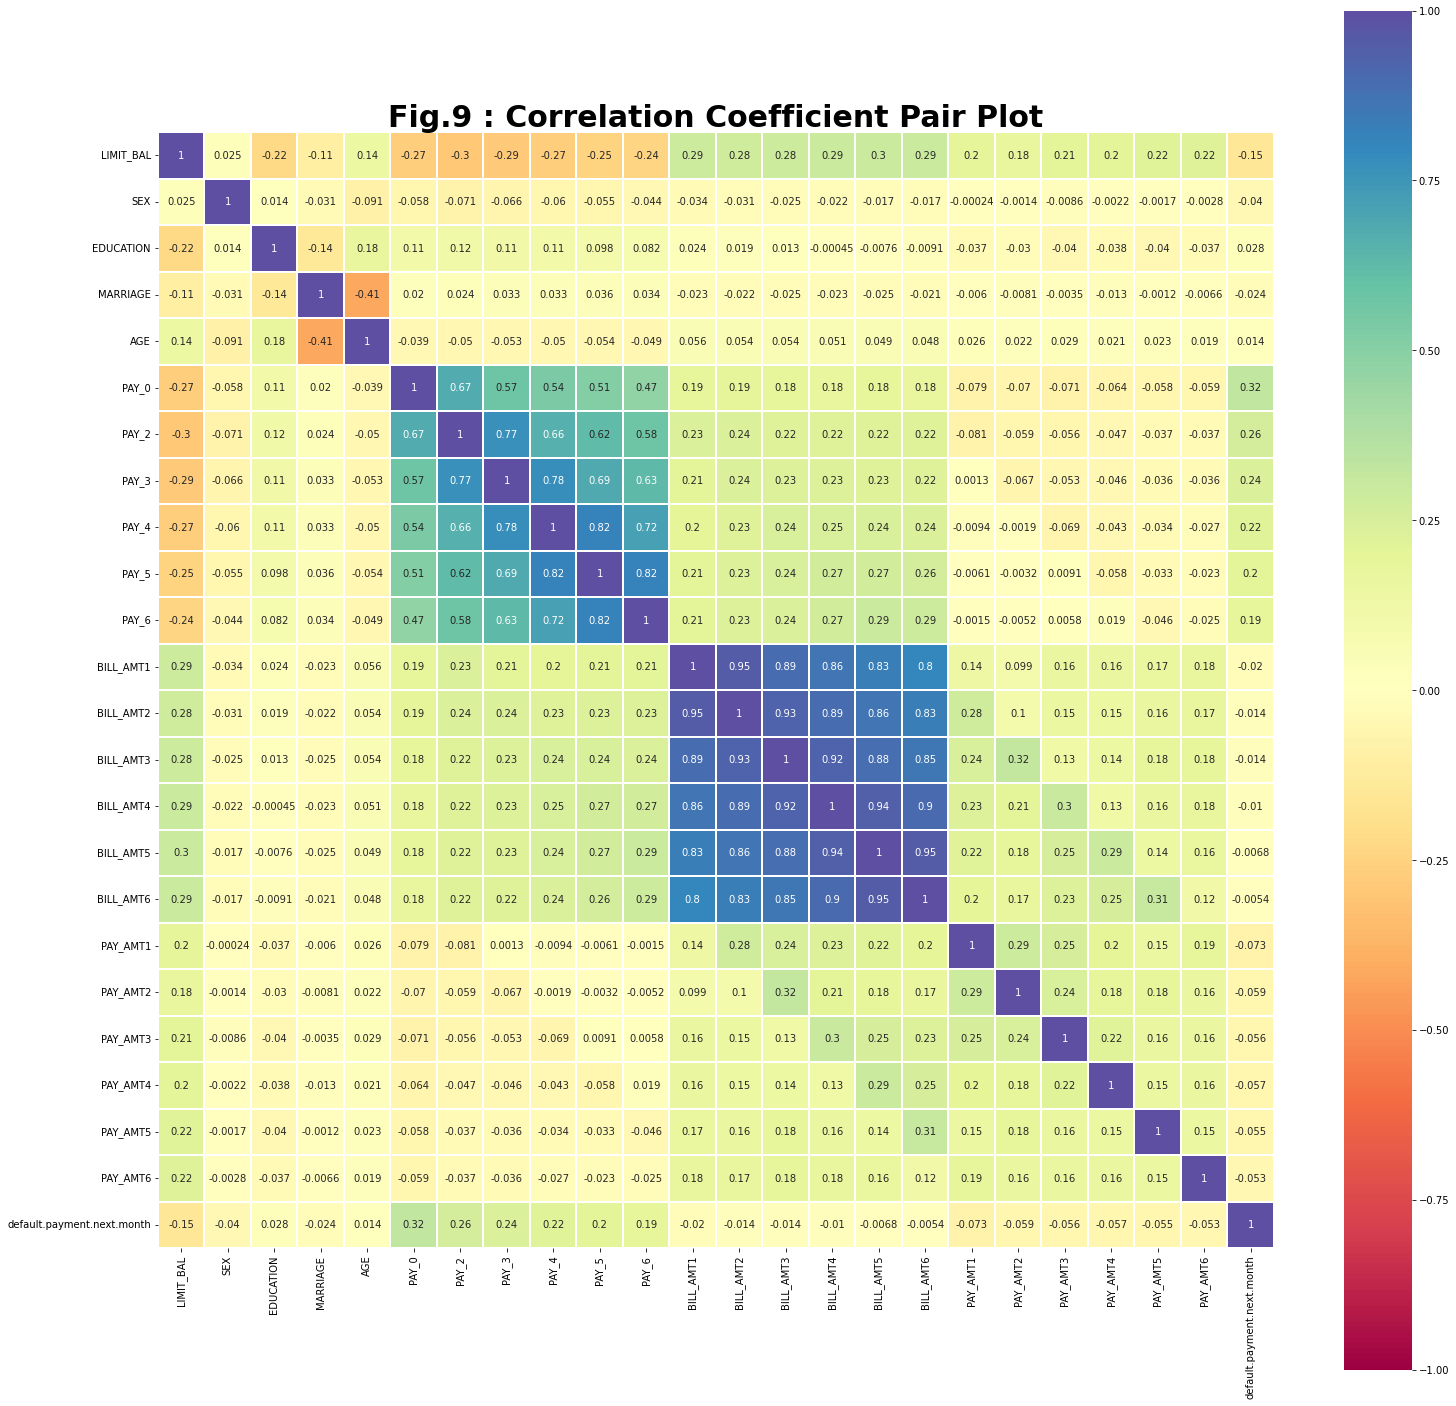

In [11]:
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = data.drop(['ID'], axis=1).corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Fig.9 : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

Figure 9 demonstrates that although attributes linked to bill amount ('BILL AMT') have a strong correlation with one another, they only contribute minimally to the goal label ('default.payment.next.month'). One can remove these features if computational resources are constrained without significantly reducing prediction accuracy.

The features associated with payment status ('PAY') are likewise connected, but they also contribute most to the final label. The final column shows unequivocally that the importance of payment status grows as we approach closer to the current month.

However, at this time, all of these features are still intact and will be used directly in the deep learning model despite the interesting negative association between "SEX" and "MARRIAGE," which might be used to generate new features.


## 3. Feature Engineering

In [12]:
non_default = len(data[data['default.payment.next.month']==0])
default = len(data[data['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.2212


In [13]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

predictors = data.drop(['ID','default.payment.next.month'], axis=1).values
predictors = StandardScaler().fit_transform(predictors)

target = to_categorical(data['default.payment.next.month']) 

## 4. Model Building

In [15]:
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

target = data['default.payment.next.month'].values
n_cols = predictors.shape[1]

def build_model(optimizer='adam', dropout=0.0, batch_norm=False, l2_reg=0.0):
    model = keras.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(n_cols,), kernel_regularizer=l2(l2_reg)))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create a classifier from the Keras model
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=1)

# define the grid search parameters
# Define the parameter grid
param_grid = {'optimizer': ['adam', 'rmsprop','SGD','adagrad'],
              'dropout': [0.0, 0.2],
              'batch_norm': [False, True],
              'l2_reg': [0.0, 0.01]}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(predictors, target)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, std_score in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, std_score, params))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


<ipython-input-15-6c3b5c7167e8>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=1)
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 0.5145 - accuracy: 0.7805
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4519 - accuracy: 0.8118
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4454 - accuracy: 0.8159
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4432 - accuracy: 0.8138
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4397 - accuracy: 0.8168
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4402 - accuracy: 0.8170
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4399 - accuracy: 0.8160
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.4379 - accuracy: 0.8175
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4383 - accuracy: 0.8173
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4368 - accuracy: 0.8182

## 5. Results

Best score: 0.8202666640281677
Best params: {'batch_norm': True, 'dropout': 0.2, 'l2_reg': 0.0, 'optimizer': 'rmsprop'}


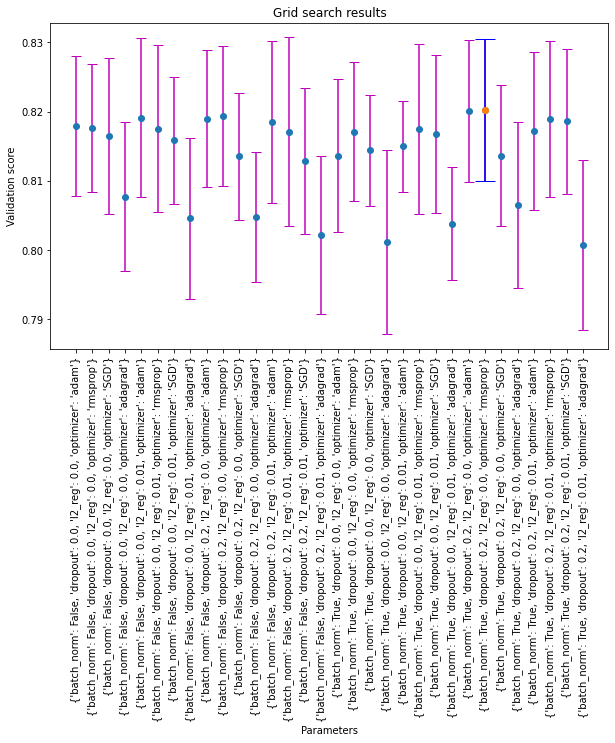

In [16]:
import matplotlib.pyplot as plt

# Extract the best parameters and the corresponding score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

# Extract the validation scores for each combination of parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Print the best parameters and the corresponding score
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')

# Plot the validation scores for each combination of parameters
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(np.arange(len(params)), means, yerr=stds,ecolor='m', fmt='o', capsize=5)
ax.set_xticks(np.arange(len(params)))
ax.set_xticklabels([str(p) for p in params], rotation=90)
ax.set_xlabel('Parameters')
ax.set_ylabel('Validation score')
ax.set_title('Grid search results')

# Find the index of the bar for the best parameter combination
best_index = params.index(best_params)

# Highlight the bar for the best parameter combination
ax.errorbar(best_index, means[best_index], yerr=stds[best_index], ecolor='b', fmt='o', capsize=10)


plt.show()
